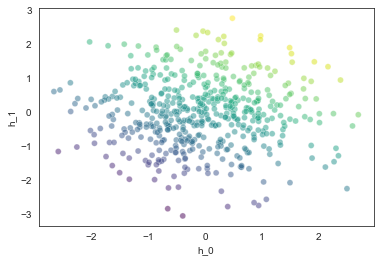

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed_n = 0
np.random.seed(seed_n)

# Generate Gaussian white noise data
mean, std, h_shape = 0, 1, (500, 2)
hidden = np.random.normal(mean, std, h_shape)

# Create a dataframe to carry the data
column_names = [f'h_{i}' for i in range(h_shape[1])]
data = pd.DataFrame(hidden, columns=column_names)

# Create a transformation matrix for generating labels
A = np.random.normal(mean, std, size=(1, h_shape[1]))
labels = (A @ hidden.T).T

# Add labels to the dataframe
data['y'] = labels

# Plot the first 2 columns colored by label
sns.set_style('white')
viridis_map = sns.color_palette('viridis', as_cmap=True)
sns.scatterplot(data=data, x='h_0', y='h_1', hue='y', alpha=0.5,
                palette=viridis_map).get_legend().remove()
plt.show()

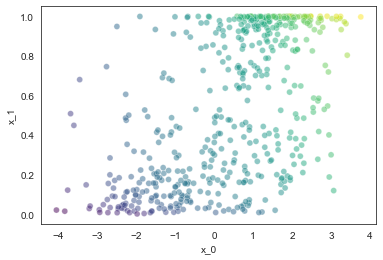

In [15]:
from data_generating_function import data_generating_function

# Generate the observations and add them to dataframe
observations = data_generating_function(hidden, 2, 10)
for i in range(observations.shape[1]):
    data[f'x_{i}'] = observations.T[i]

sns.scatterplot(data=data, x='x_0', y='x_1', hue='y', alpha=0.5,
                palette=viridis_map).get_legend().remove()
plt.show()